In [1]:
# load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))
suppressWarnings(suppressPackageStartupMessages(library(ggsignif)))
# import ggplot theme
source("../../utils/figure_themes.r")

In [2]:
# path to the anova data
sum_aggregated_anova_genotype_df_path <- file.path("..","..","data","6.analysis_results","sum_aggregated_anova_results.parquet")
sum_aggregated_data_path <- file.path("..","..","data","5.converted_data","sum_aggregated_data.parquet")
fig_path <- file.path("..","figures","sum_aggregated")
# create the figure directory if it does not exist
if (!dir.exists(fig_path)){
  dir.create(fig_path, recursive = TRUE)
}

# read the data
sum_aggregated_data_df <- arrow::read_parquet(sum_aggregated_data_path)
head(sum_aggregated_data_df)

# read the anova data
sum_aggregated_anova_df <- arrow::read_parquet(sum_aggregated_anova_genotype_df_path)


Metadata_genotype,Metadata_replicate,Metadata_side,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high,1,L,-0.1787974,-0.1787974,0.003557521,-0.3867965,0.2801180,0.037997585,0.4340460,⋯,-0.6277618,-0.6449902,-0.90335362,-0.8909394,-0.89699453,-0.90287010,-0.89614520,-0.89844840,-0.89887968,-0.89660930
high,1,R,1.3717630,1.3717630,0.538195037,0.2883216,0.5016182,4.163832754,-1.3619197,⋯,0.4195514,0.4069176,-0.18835794,-0.1591142,-0.18961488,-0.18630752,-0.21898136,-0.22575440,-0.21907311,-0.22513426
high,10,L,1.7062336,1.7062336,2.652373336,3.2804249,-1.9929659,0.184629766,-1.4043758,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
high,10,R,0.7716744,0.7716744,-1.332747275,0.1643035,0.2443713,0.173760455,-1.8851436,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
high,11,L,2.1808575,2.1808575,2.142685571,1.8380375,-0.0775148,0.008650445,0.8765967,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
high,11,R,2.0815568,2.0815568,-0.880954492,1.0149013,0.6606970,3.593763273,-1.4179216,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842


## Genotype, side and identity level data

### ANOVA means

In [3]:

sum_aggregated_anova_df$log10_anova_p_value <- -log10(sum_aggregated_anova_df$anova_p_value)
# order the results by log10 anova p-value
sum_aggregated_anova_df <- sum_aggregated_anova_df %>% arrange(log10_anova_p_value)
# split the feature into 3 groups at "_"
sum_aggregated_anova_df$feature_type <- sapply(strsplit(sum_aggregated_anova_df$feature, "_"), function(x) x[1])
sum_aggregated_anova_df$feature_name <- sapply(strsplit(sum_aggregated_anova_df$feature, "_"), function(x) x[2])
head(sum_aggregated_anova_df)


group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,log10_anova_p_value,feature_type,feature_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
high,unsel,0.0411,0.9927,-0.8081,0.8904,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9672880,0.01444418,RadialDistribution,ZernikePhase
high,wt,0.0908,0.9641,-0.7507,0.9323,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9672880,0.01444418,RadialDistribution,ZernikePhase
unsel,wt,0.0496,0.9893,-0.7996,0.8989,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9672880,0.01444418,RadialDistribution,ZernikePhase
high,unsel,0.1580,0.8916,-0.6684,0.9845,FALSE,RadialDistribution_ZernikePhase_OP_9_1,0.8995139,0.04599210,RadialDistribution,ZernikePhase
high,wt,0.0953,0.9583,-0.7236,0.9143,FALSE,RadialDistribution_ZernikePhase_OP_9_1,0.8995139,0.04599210,RadialDistribution,ZernikePhase
unsel,wt,-0.0627,0.9821,-0.8892,0.7638,FALSE,RadialDistribution_ZernikePhase_OP_9_1,0.8995139,0.04599210,RadialDistribution,ZernikePhase


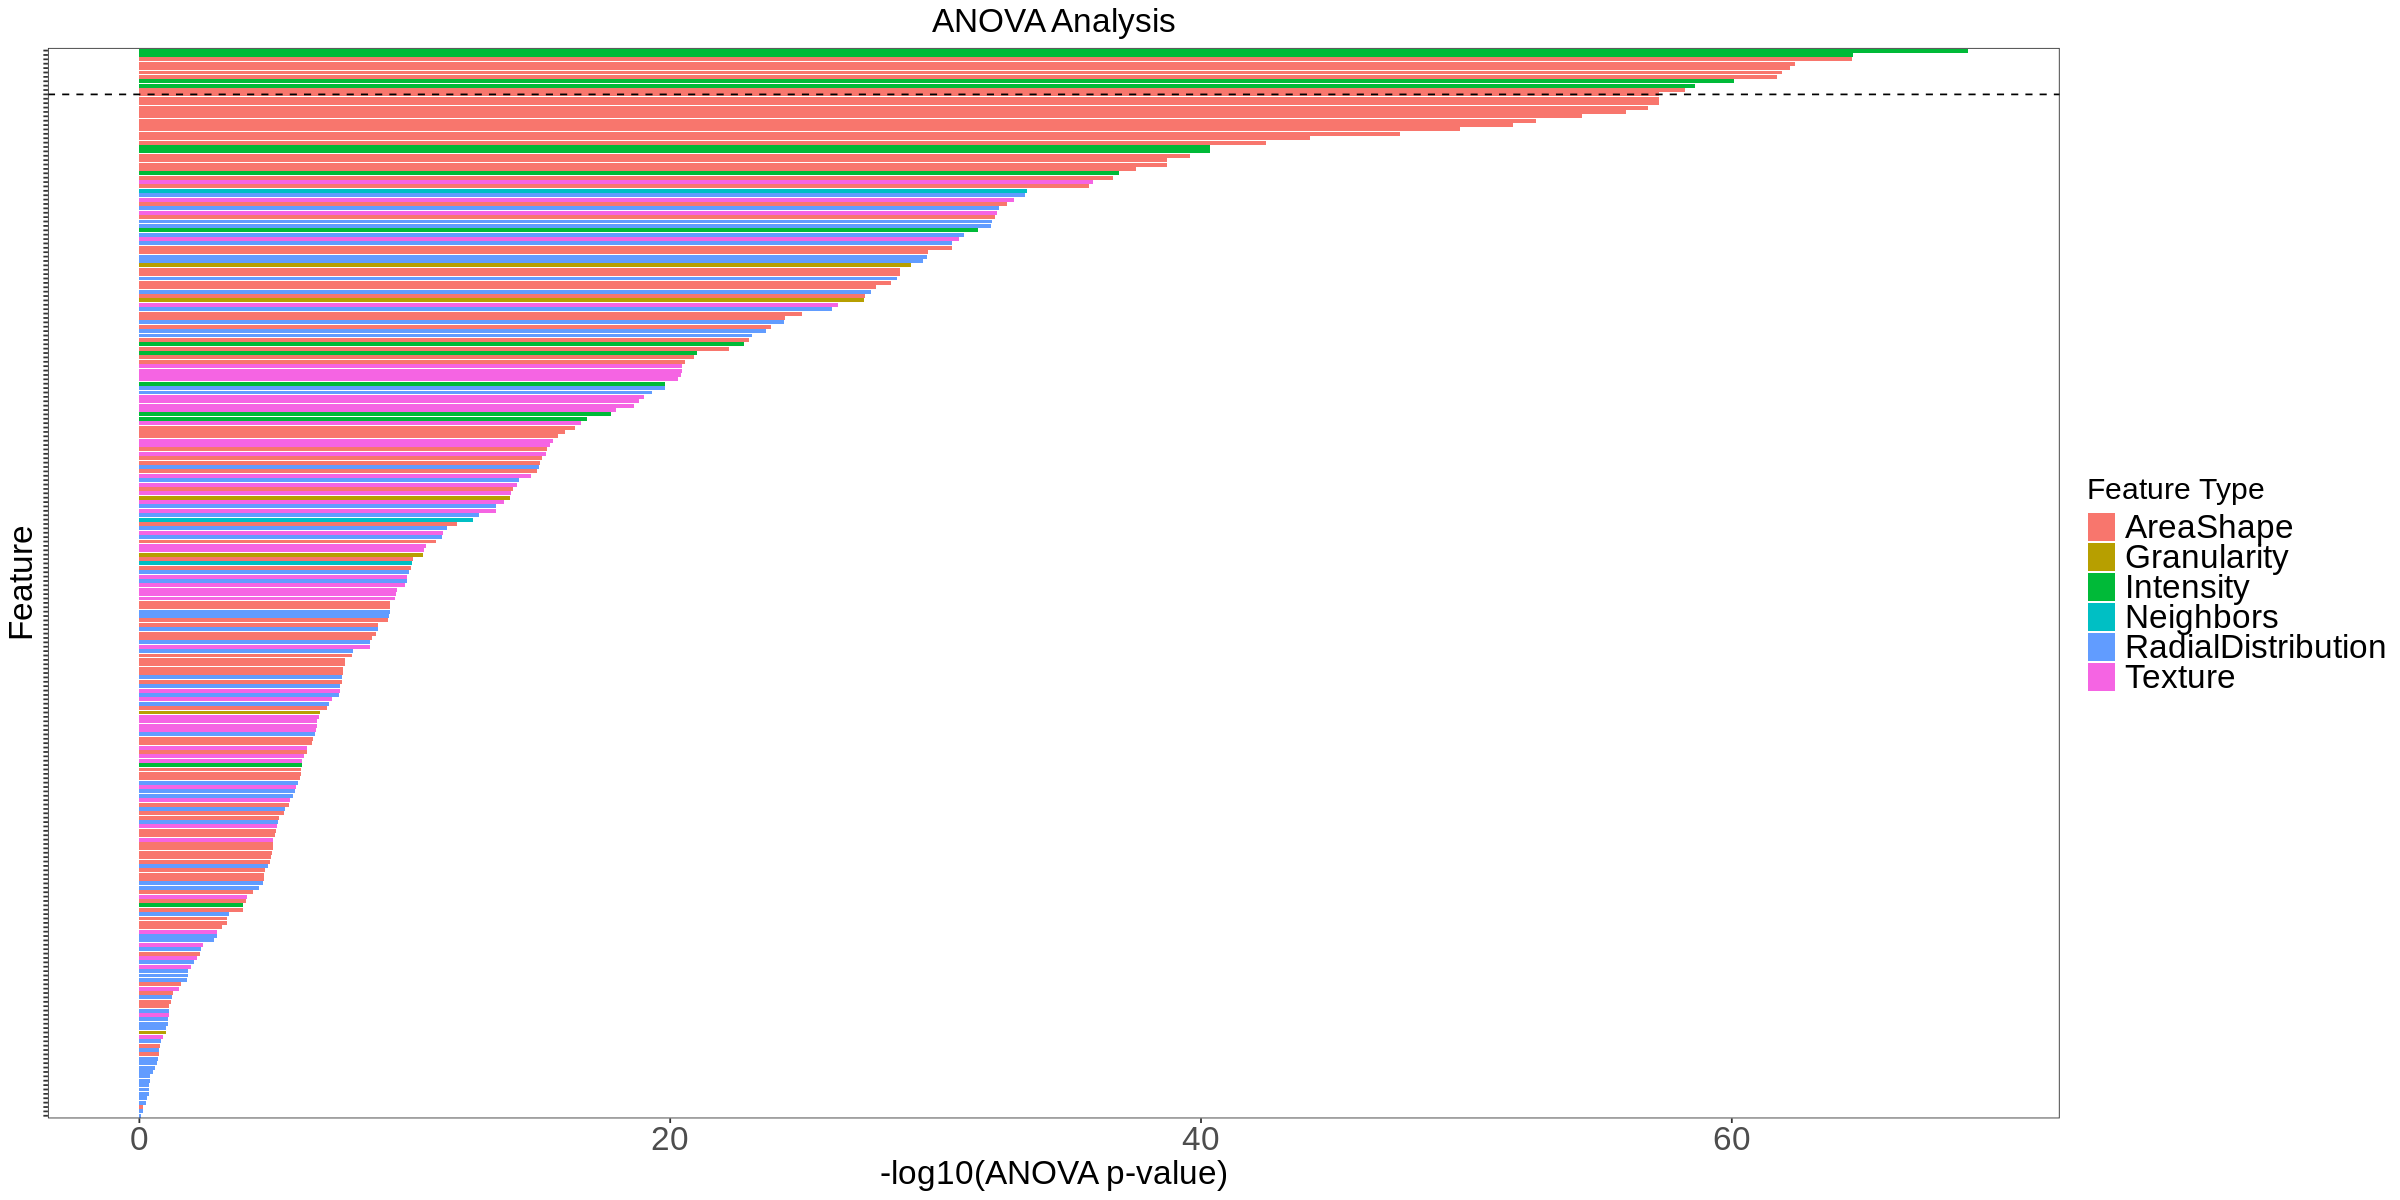

In [4]:
width <- 20
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
anova_plot <- (
    # order the results by log10 anova p-value
    ggplot(sum_aggregated_anova_df, aes(y = reorder(feature, log10_anova_p_value), x = log10_anova_p_value, fill = feature_type))
    + geom_bar(stat = "identity")
    # drop y axis labels
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + labs(title = "ANOVA Analysis", y = "Feature", x = "-log10(ANOVA p-value)", fill = "Feature Type")
   
    + figure_theme


    + theme(axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
    + theme(axis.text.y = element_blank())
    + geom_hline(yintercept = length(unique(sum_aggregated_anova_df$feature))-10, linetype = "dashed", color = "black")
     
)
anova_plot
# save the plot
ggsave(file = "sum_aggregated_anova_plot.png", plot = anova_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

## Test for equality of variance 

In [5]:
# load levene data in 
sum_aggregated_levene_df_path <- file.path("..","..","data","6.analysis_results","sum_aggregated_levene_test_results.csv")
sum_aggregated_levene_df <- read.csv(sum_aggregated_levene_df_path)
# make a new column for ***
sum_aggregated_levene_df$significance <- ifelse(
    sum_aggregated_levene_df$levene_p_value < 0.001, "***", 
    ifelse(sum_aggregated_levene_df$levene_p_value < 0.01, "**", 
    ifelse(sum_aggregated_levene_df$levene_p_value < 0.05, "*", 
    "ns")
    )
)
head(sum_aggregated_levene_df)

,X,feature,levene_statistic,levene_p_value,group,significance
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,584,AreaShape_Zernike_9_7,5.950521e-06,0.9980628,unsel_vs_wt,ns
2,665,RadialDistribution_ZernikePhase_OP_6_6,2.464655e-05,0.9960575,unsel_vs_wt,ns
3,618,RadialDistribution_RadialCV_OP_1of4,1.497727e-04,0.9902816,unsel_vs_wt,ns
4,539,AreaShape_NormalizedMoment_3_2,3.375332e-04,0.9854110,unsel_vs_wt,ns
5,58,AreaShape_SpatialMoment_0_2,3.788321e-04,0.9845444,high_vs_unsel,ns
6,916,RadialDistribution_ZernikePhase_OP_8_4,1.734878e-02,0.9828045,all,ns


### Variances

In [6]:
width <- 4
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
# make a new column for the group1 and group2
sum_aggregated_anova_df$comparison <- paste(sum_aggregated_anova_df$group1, sum_aggregated_anova_df$group2, sep = " - ")

# order the results by anova p-value
sum_aggregated_anova_df <- sum_aggregated_anova_df %>% arrange(anova_p_value)
features <- unique(sum_aggregated_anova_df$feature)[1:20]
features
top_20_sum_aggregated_anova_df <- sum_aggregated_anova_df %>% filter(feature %in% features)
top_20_sum_aggregated_anova_df$log10_tukey_p_value <- -log10(top_20_sum_aggregated_anova_df$`p-adj`)
# make the genotype a factor
# replace the genotype values
sum_aggregated_data_df$Metadata_genotype <- gsub("wt", "Wild Type", sum_aggregated_data_df$Metadata_genotype)
sum_aggregated_data_df$Metadata_genotype <- gsub("unsel", "Mid-Severity", sum_aggregated_data_df$Metadata_genotype)
sum_aggregated_data_df$Metadata_genotype <- gsub("high", "High-Severity", sum_aggregated_data_df$Metadata_genotype)
sum_aggregated_data_df$Metadata_genotype <- factor(
    sum_aggregated_data_df$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)
head(sum_aggregated_data_df)

[1] "Intensity_MeanIntensityEdge_OP"      
 [2] "Intensity_MaxIntensityEdge_OP"       
 [3] "AreaShape_Zernike_0_0"               
 [4] "AreaShape_MinorAxisLength"           
 [5] "AreaShape_Zernike_2_0"               
 [6] "AreaShape_MedianRadius"              
 [7] "AreaShape_MinFeretDiameter"          
 [8] "Intensity_StdIntensityEdge_OP"       
 [9] "Intensity_LowerQuartileIntensity_OP" 
[10] "AreaShape_MeanRadius"                
[11] "AreaShape_Area"                      
[12] "AreaShape_CentralMoment_0_0"         
[13] "AreaShape_SpatialMoment_0_0"         
[14] "AreaShape_ConvexArea"                
[15] "AreaShape_MaximumRadius"             
[16] "AreaShape_EquivalentDiameter"        
[17] "AreaShape_InertiaTensorEigenvalues_1"
[18] "AreaShape_HuMoment_0"                
[19] "AreaShape_SpatialMoment_1_0"         
[20] "AreaShape_SpatialMoment_0_1"

Metadata_genotype,Metadata_replicate,Metadata_side,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High-Severity,1,L,-0.1787974,-0.1787974,0.003557521,-0.3867965,0.2801180,0.037997585,0.4340460,⋯,-0.6277618,-0.6449902,-0.90335362,-0.8909394,-0.89699453,-0.90287010,-0.89614520,-0.89844840,-0.89887968,-0.89660930
High-Severity,1,R,1.3717630,1.3717630,0.538195037,0.2883216,0.5016182,4.163832754,-1.3619197,⋯,0.4195514,0.4069176,-0.18835794,-0.1591142,-0.18961488,-0.18630752,-0.21898136,-0.22575440,-0.21907311,-0.22513426
High-Severity,10,L,1.7062336,1.7062336,2.652373336,3.2804249,-1.9929659,0.184629766,-1.4043758,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
High-Severity,10,R,0.7716744,0.7716744,-1.332747275,0.1643035,0.2443713,0.173760455,-1.8851436,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
High-Severity,11,L,2.1808575,2.1808575,2.142685571,1.8380375,-0.0775148,0.008650445,0.8765967,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
High-Severity,11,R,2.0815568,2.0815568,-0.880954492,1.0149013,0.6606970,3.593763273,-1.4179216,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842


In [7]:
width <- 8
height <- 8

list_of_genotype_anova_plots_by_genotype <- list()

for (i in 1:length(features)){
    print(features[i])
    # get the top feature
    tmp <- sum_aggregated_data_df %>% select(c("Metadata_genotype", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))

    # get the levene test result for the selected feature
    tmp_levene <- sum_aggregated_levene_df %>% filter(feature == features[i])
    WT_vs_high_significance <- tmp_levene %>% filter(group == "high_vs_unsel")
    WT_vs_unsel_significance <- tmp_levene %>% filter(group == "unsel_vs_wt")
    unsel_vs_high_significance <- tmp_levene %>% filter(group == "high_vs_wt")
    WT_vs_high_significance <- WT_vs_high_significance$significance
    WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
    unsel_vs_high_significance <- unsel_vs_high_significance$significance

    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    title <- gsub("_", " ", features[i])

    # get the max value of the variance
    max_var <- max(tmp$variance)
    # add 0.3 to the max value to get the y max
    max_var_plot <- max_var + 3


    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = title, x = "Genotype", y = "Variance", fill = "Genotype")
        + theme_bw()
        + figure_theme
     
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+0.5, max_var+1)        
            ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_var+0.5, max_var+1)        
            )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+1.5, max_var+2)        
        )
           # remove the legend
        + theme(legend.position = "none")
        + ylim(0,max_var_plot)
    )
    # save var plot
    ggsave(file = paste0("sum_aggregated_", features[i], "_variance_plot_genotype.png"), plot = var_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

    list_of_genotype_anova_plots_by_genotype[[i]] <- var_plot
}

[1] "Intensity_MeanIntensityEdge_OP"


[1] "Intensity_MaxIntensityEdge_OP"


[1] "AreaShape_Zernike_0_0"


[1] "AreaShape_MinorAxisLength"


[1] "AreaShape_Zernike_2_0"


[1] "AreaShape_MedianRadius"


[1] "AreaShape_MinFeretDiameter"


[1] "Intensity_StdIntensityEdge_OP"


[1] "Intensity_LowerQuartileIntensity_OP"


[1] "AreaShape_MeanRadius"


[1] "AreaShape_Area"


[1] "AreaShape_CentralMoment_0_0"


[1] "AreaShape_SpatialMoment_0_0"


[1] "AreaShape_ConvexArea"


[1] "AreaShape_MaximumRadius"


[1] "AreaShape_EquivalentDiameter"


[1] "AreaShape_InertiaTensorEigenvalues_1"


[1] "AreaShape_HuMoment_0"


[1] "AreaShape_SpatialMoment_1_0"


[1] "AreaShape_SpatialMoment_0_1"


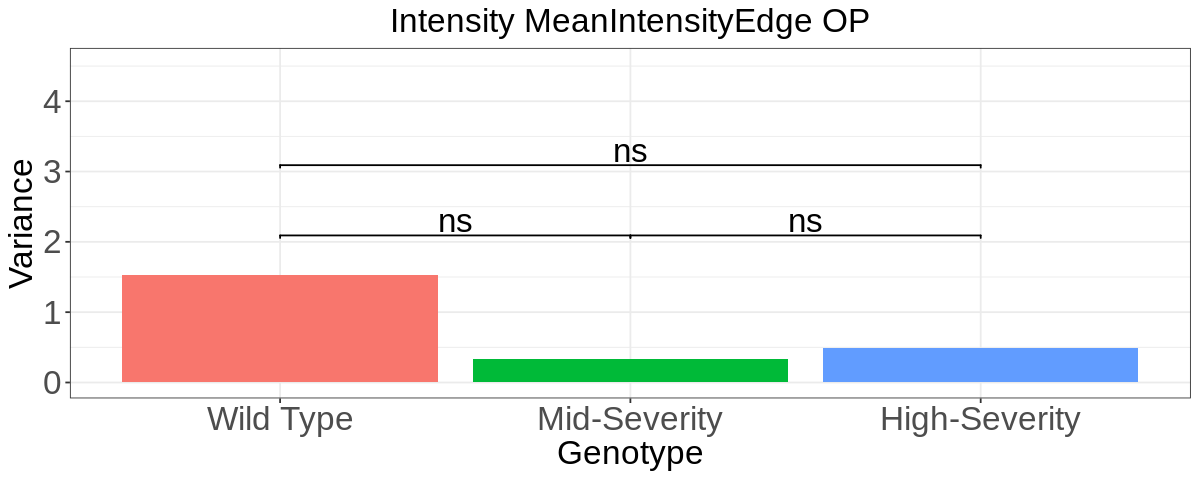

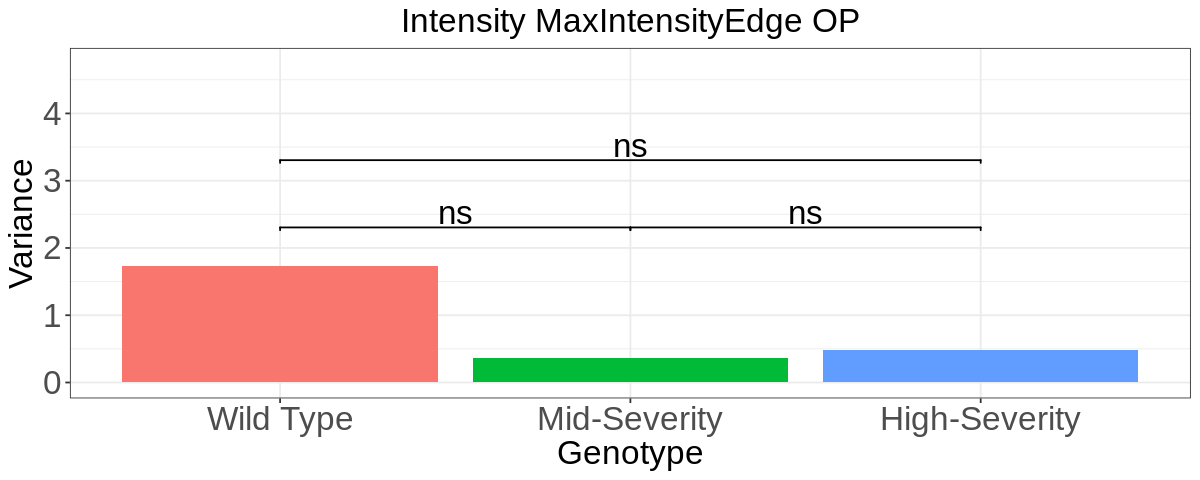

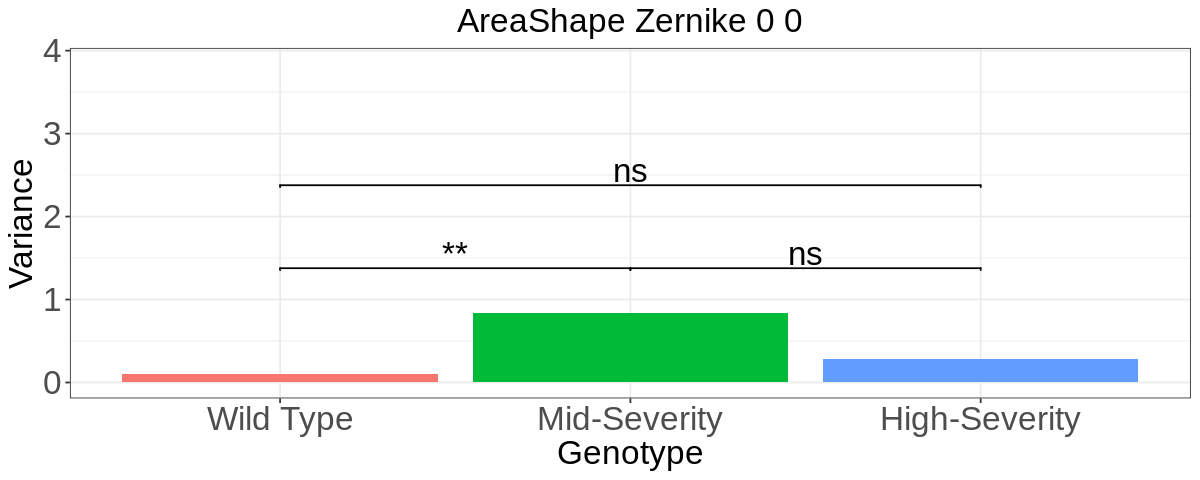

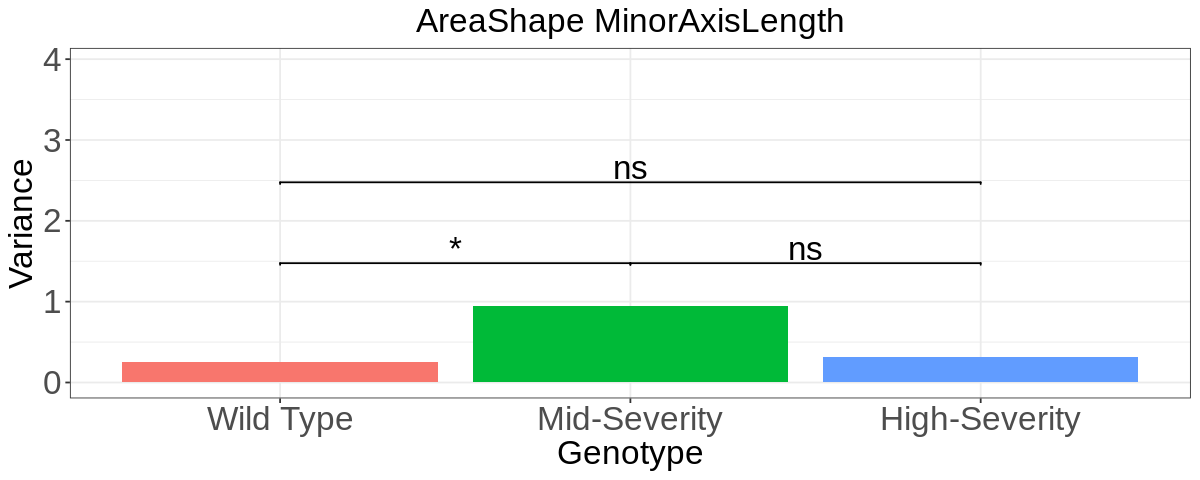

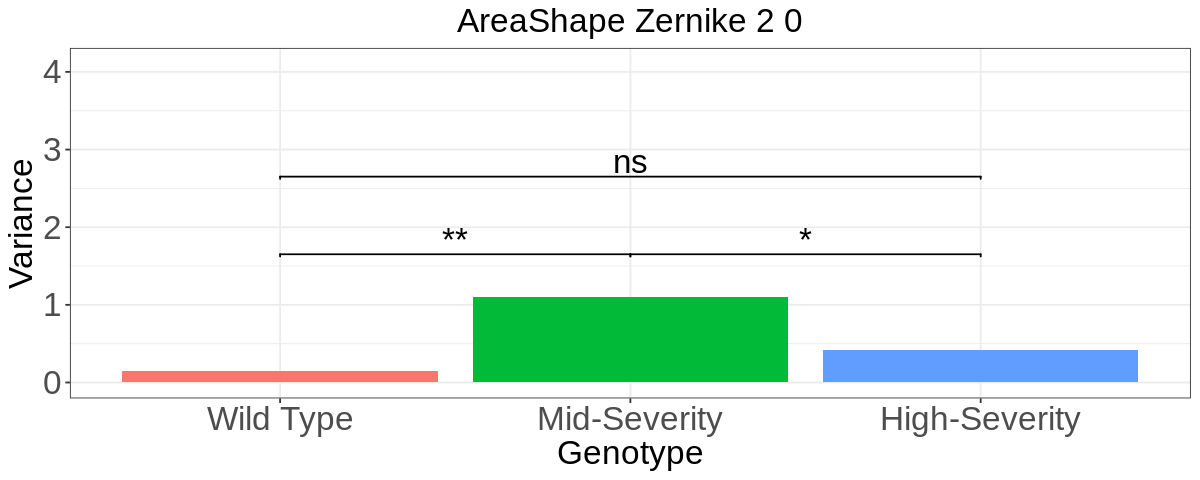

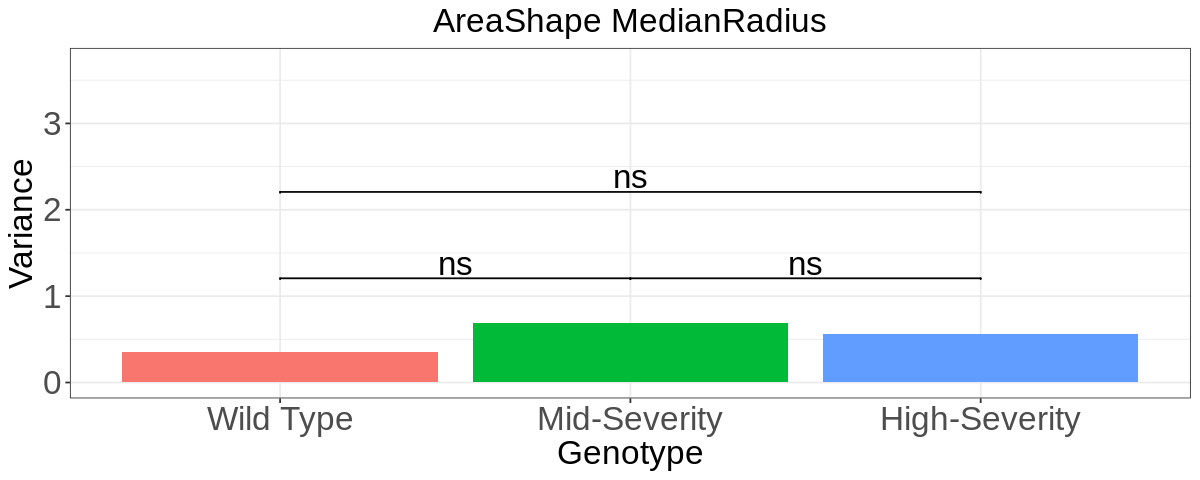

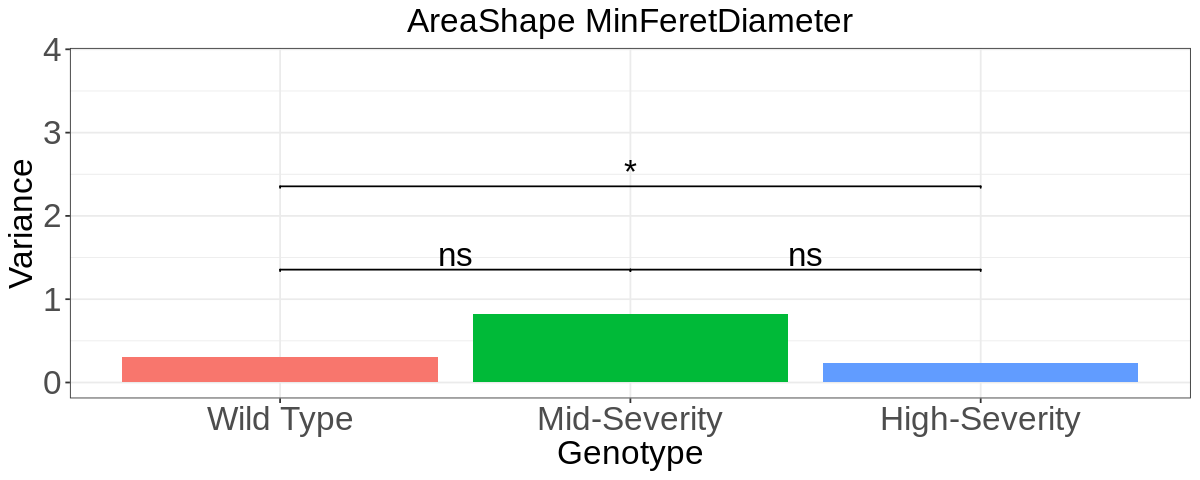

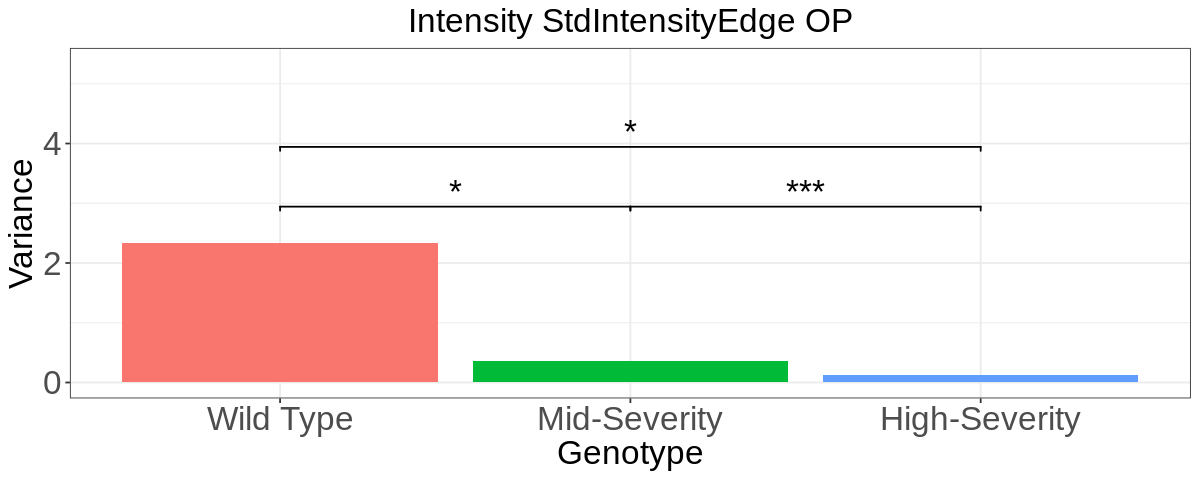

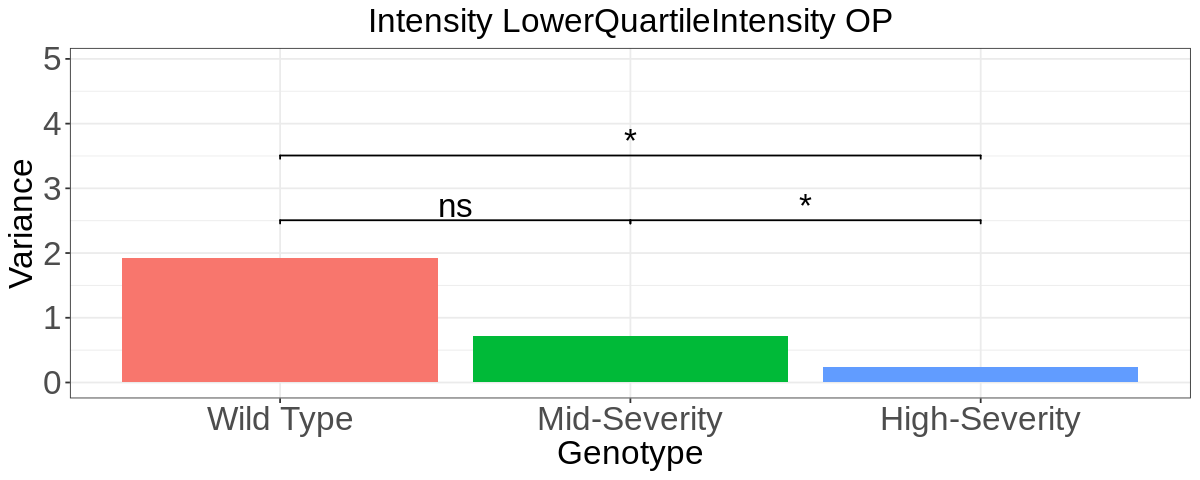

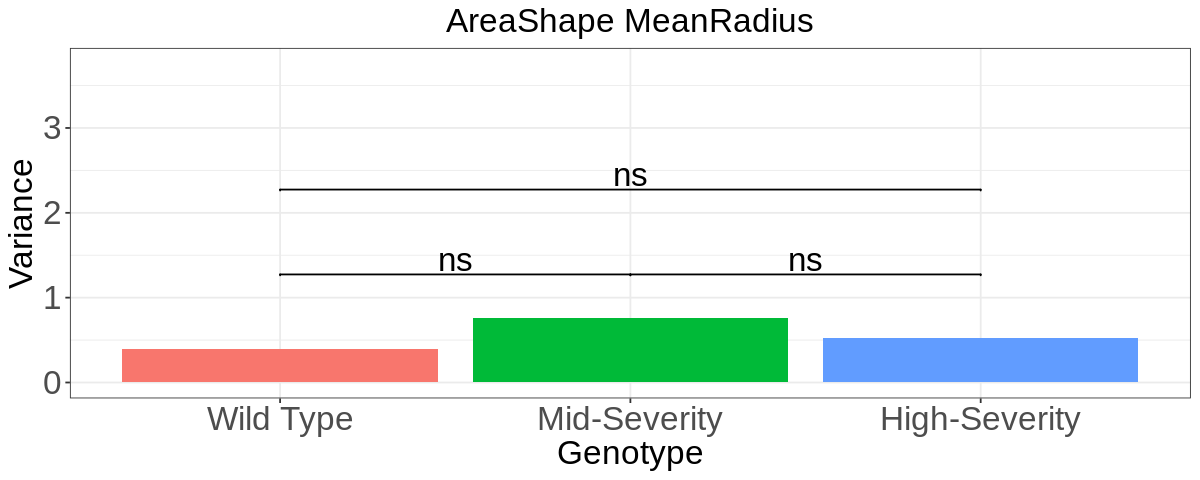

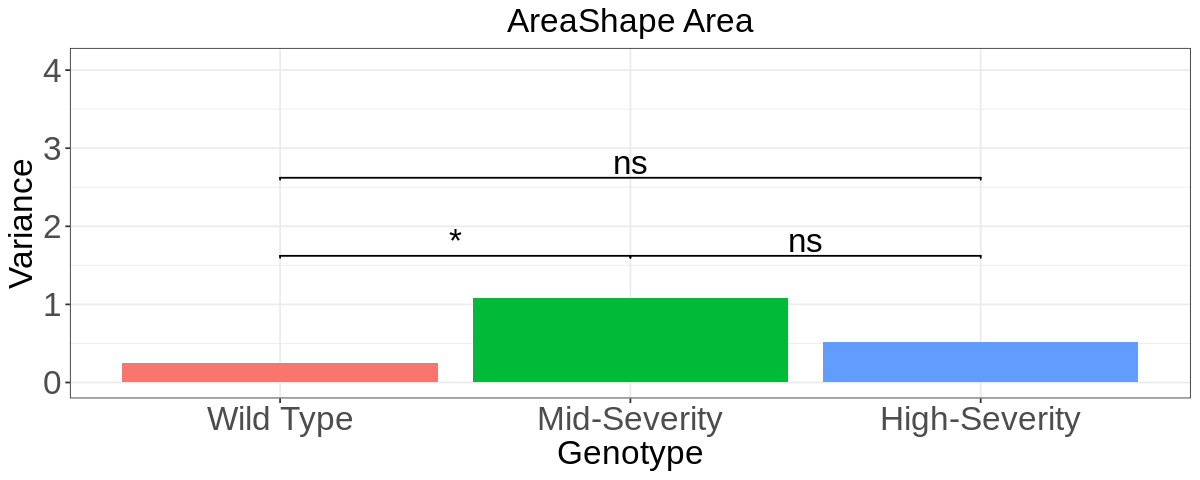

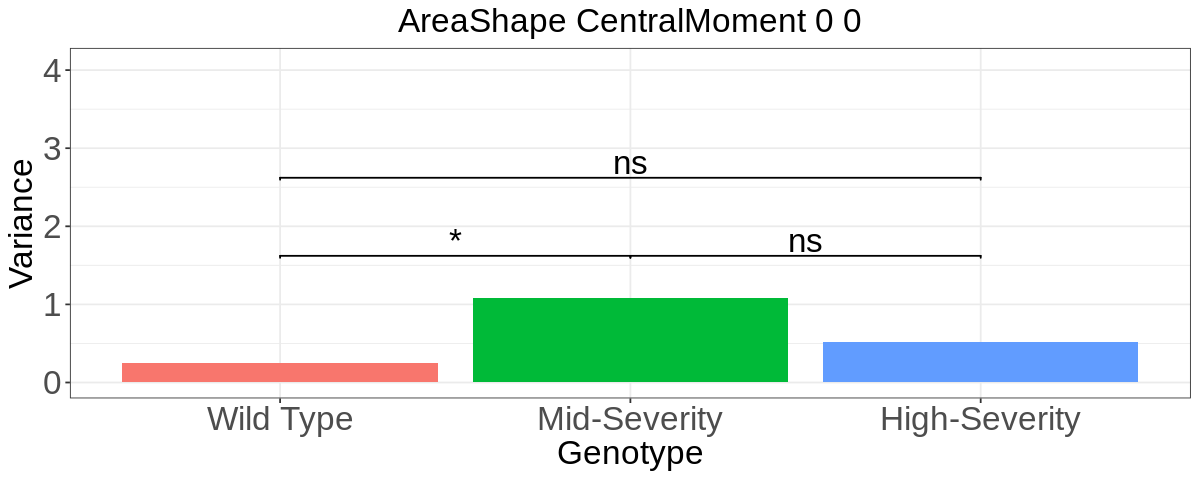

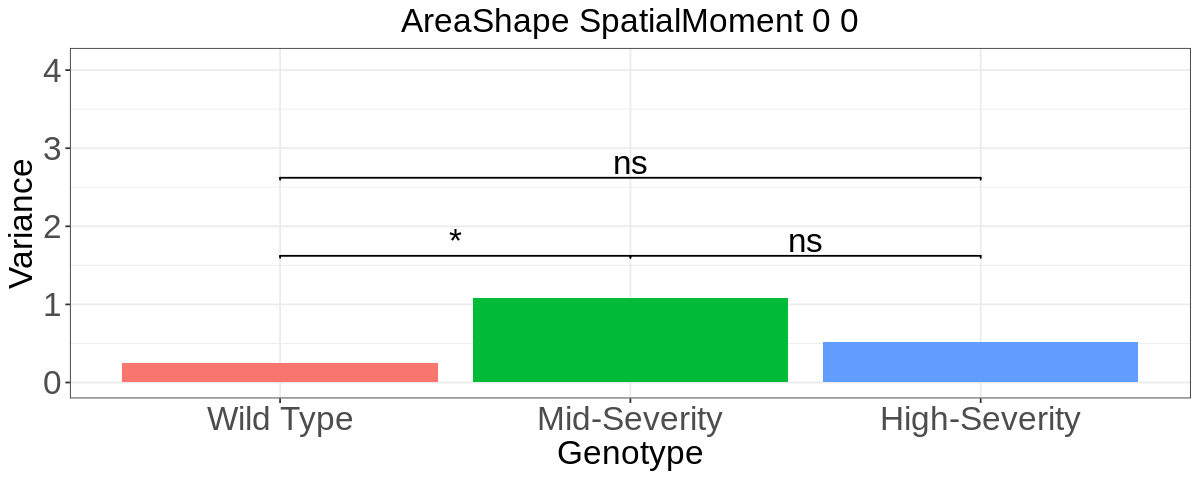

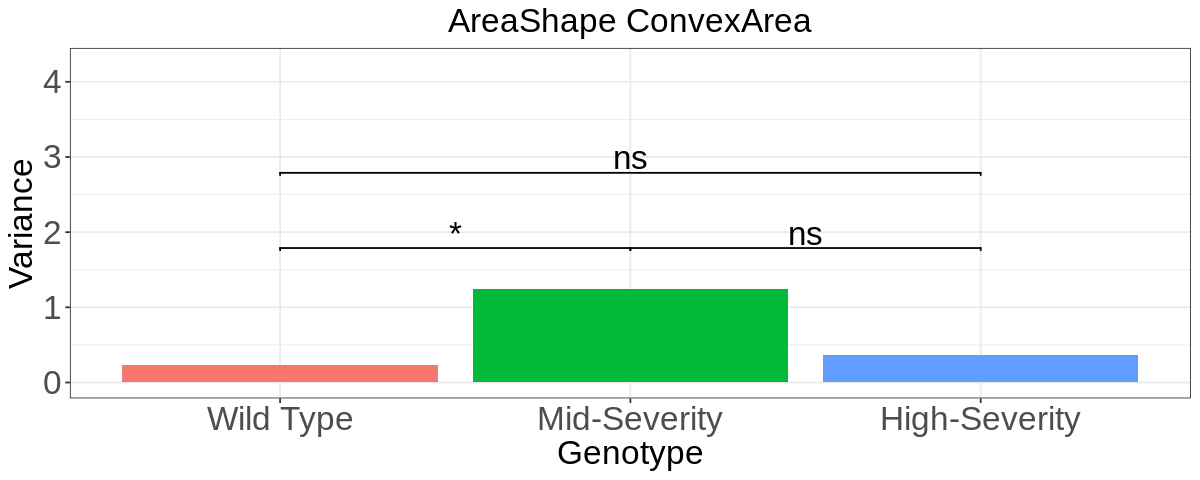

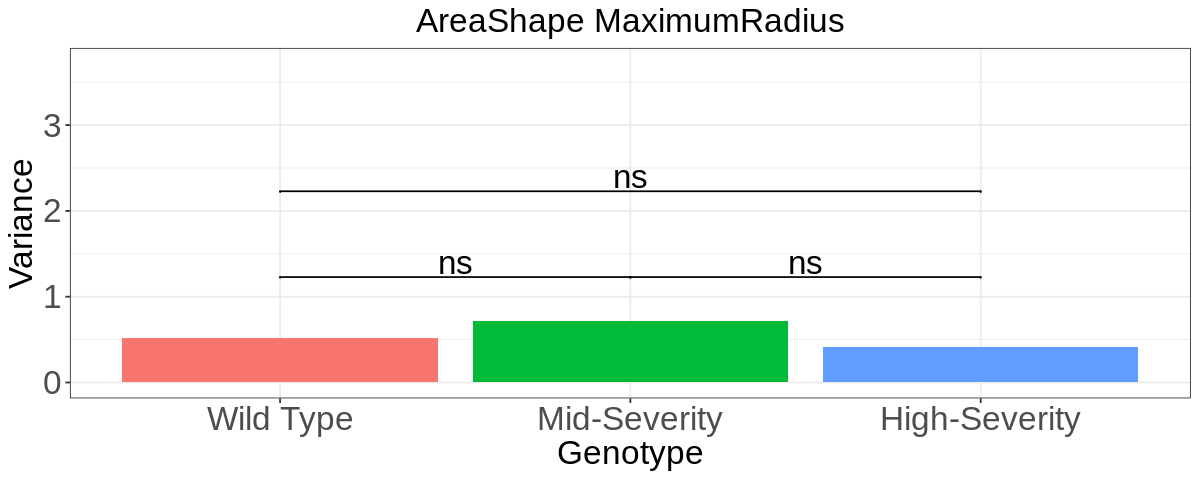

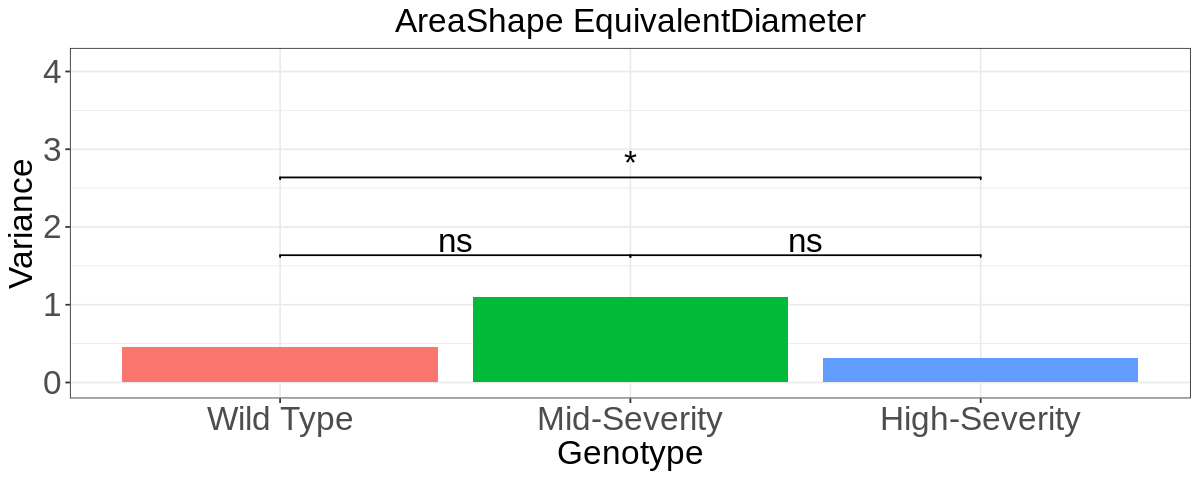

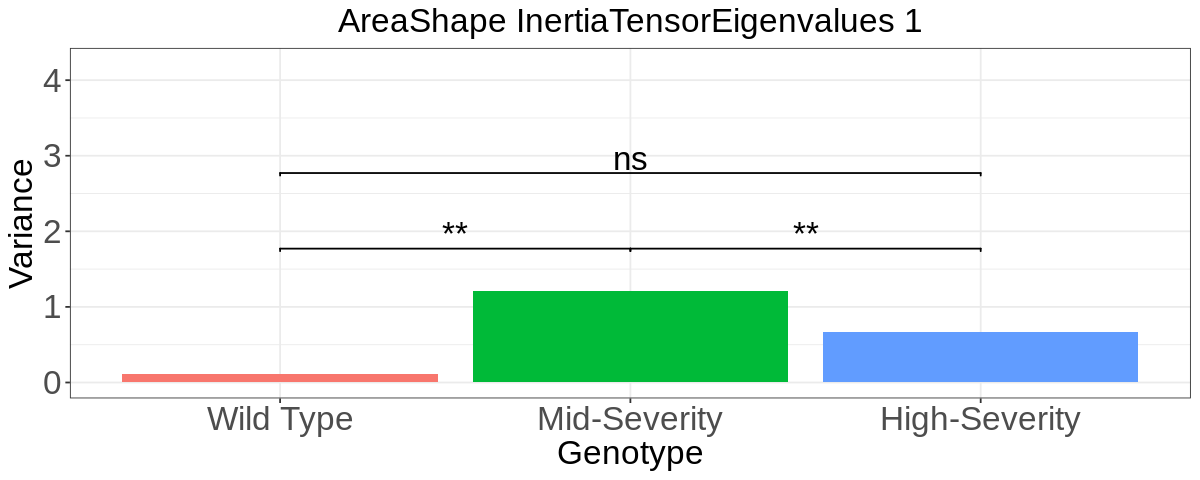

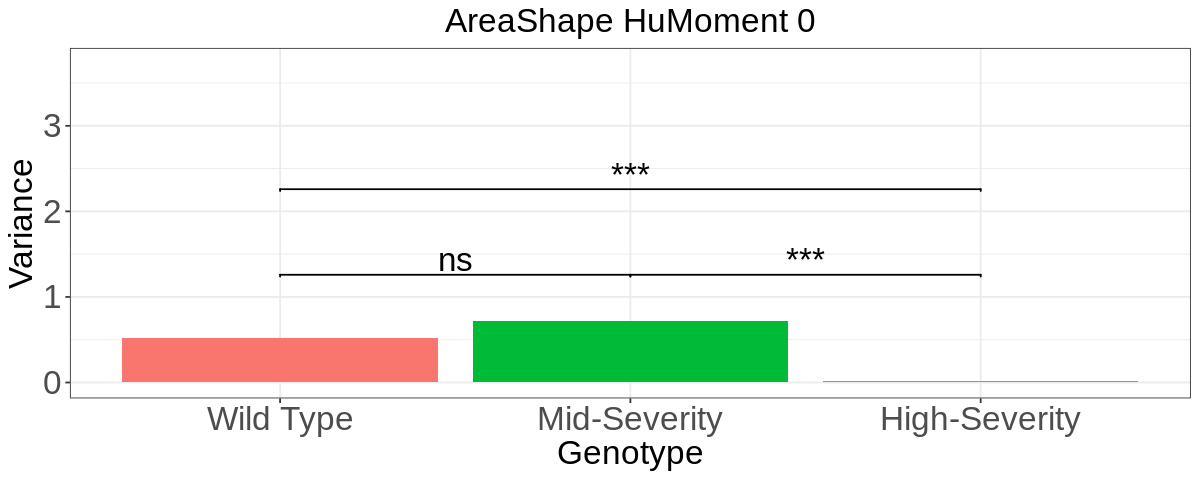

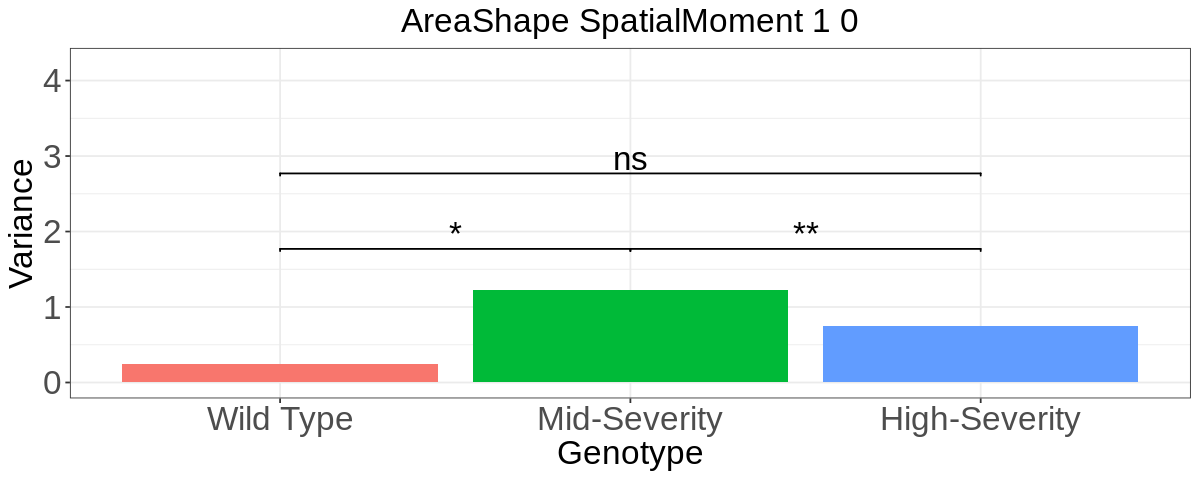

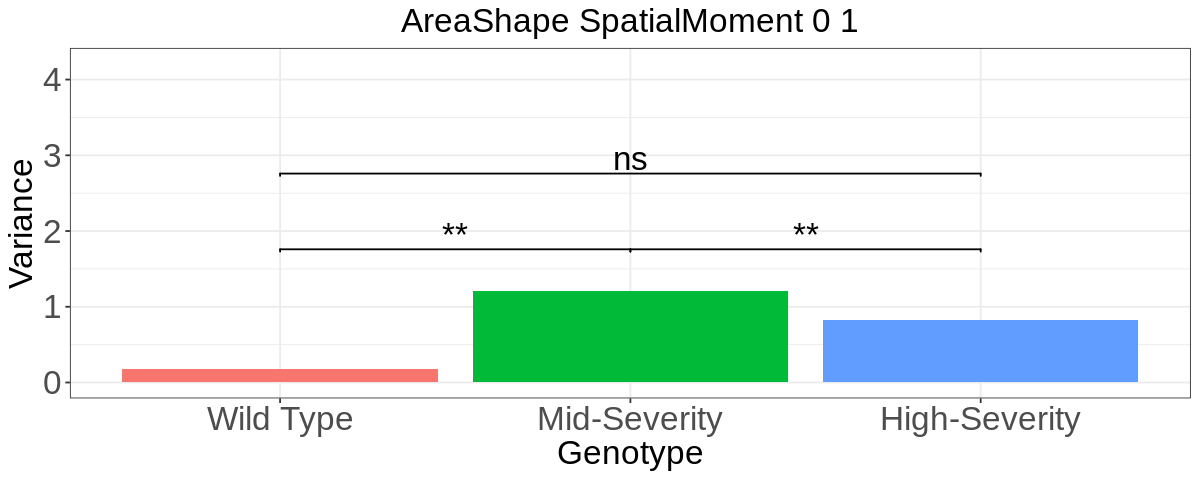

In [8]:
width <- 10
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
list_of_genotype_anova_plots_by_genotype[[1]]
list_of_genotype_anova_plots_by_genotype[[2]]
list_of_genotype_anova_plots_by_genotype[[3]]
list_of_genotype_anova_plots_by_genotype[[4]]
list_of_genotype_anova_plots_by_genotype[[5]]
list_of_genotype_anova_plots_by_genotype[[6]]
list_of_genotype_anova_plots_by_genotype[[7]]
list_of_genotype_anova_plots_by_genotype[[8]]
list_of_genotype_anova_plots_by_genotype[[9]]
list_of_genotype_anova_plots_by_genotype[[10]]
list_of_genotype_anova_plots_by_genotype[[11]]
list_of_genotype_anova_plots_by_genotype[[12]]
list_of_genotype_anova_plots_by_genotype[[13]]
list_of_genotype_anova_plots_by_genotype[[14]]
list_of_genotype_anova_plots_by_genotype[[15]]
list_of_genotype_anova_plots_by_genotype[[16]]
list_of_genotype_anova_plots_by_genotype[[17]]
list_of_genotype_anova_plots_by_genotype[[18]]
list_of_genotype_anova_plots_by_genotype[[19]]
list_of_genotype_anova_plots_by_genotype[[20]]
